# Exercise 7: Clustering

## Exercise 7-4: k-Means (Solution)

Idea of the kmeans is that given an input data, we want to find a clustering such that the within-cluster variation of each cluster is small and we use the centrois of a cluster as the representative of them.
Hence, the objective for a given $k$ is to form $k$ groups such that the sum of the (squared) distances between the mean of the groups and their elements is minimal.

The objective function, we try to optimize is defined as:
$$
J = \sum_{i=0}^{k} \sum_{m \in C_i} ||m - c_i||^2
$$
where $c_i$ denotes the centroid of the cluster $C_i$.

Implement the k-Means algorithm.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
import math
import matplotlib.cm as cm
class KMeans (object):
    """
    Implementation of the KMeans algorithm
    
    Arguments:
      n_clusters: number of clusters 
      centroids: the centroids describing the cluster representatives
      seed: random seed
      
    Properties: 
      n_clusters: number of clusters
      centroids: centroids being the cluster representatives
      random_gen: random number generator (for initializing the centroids)
      cls_labels: the labels of the datapoints,i.e., indicator to which cluster a point
        is affiliated
    """
    def __init__(self, n_clusters, centroids=None, seed=42):
        self.n_clusters=n_clusters
        self.centroids=centroids
        self.random_gen=np.random.choice
    

    def _euclidean (self, x, y):
        """
        calculates the l2 distance between two vectors
        
        Returns: 
          the l2 distance (euclidean distance)
        """
        return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)
        
    def _pick_random_centroids(self, X):
        """
        method for initializing random centroids. Picks n random points out of the dataset,
        where n is the number of clusters
        
        Returns:
          n number of centroids, where n is the number of clusters 
        """
        n=np.shape(X)[0]
        return [X[i,:] for i in self.random_gen(range(n),size=self.n_clusters,replace=False)]
    
    def _plot_clustering(self, X, it):
        """
        Method for plotting the current clustering. We plot the dataset, the current
        centroids and colors indicate the cluster affiliation
        
        Arguments:
          X: the dataset the algorithm is performed on
          it: the current iteration number 
            (can be used e.g. as an additional information in the title)
        """
        plt.scatter(X[:,0],X[:,1], c=self.cls_labels)
        plt.title("Iteration: "+str(it))
        plt.show()
       
    
    def fit(self, X, max_iteration=100, visualize=False):
        """
        Method used for executing the KMeans algorithm. 
        
        Arguments: 
          X: the dataset
          max_iteration: the maximal number of iterations being performed
          visualize: whether to visualize
        """
        if self.centroids==None:
            self.centroids=self._pick_random_centroids(X)
        
        n=np.shape(X)[0]
        self.cls_labels=np.empty(n)
        
        for iteration  in range(max_iteration):
            # assign points to centroid
            for point in range(n):
                self.cls_labels[point]=np.argmin([self._euclidean(X[point,:],self.centroids[c]) for c in range(self.n_clusters)])
            
            if visualize:
                # plot
                self._plot_clustering(X,iteration)
        
            # compute new centroids
            centroids_new=[np.mean(X[np.argwhere(self.cls_labels==i)],axis=0)[0] for i in range(self.n_clusters)]
            if np.array_equal(centroids_new,self.centroids):
                break
            self.centroids=centroids_new           

Run it on the following data. What do you observe w.r.t. the robustness against the initialization?

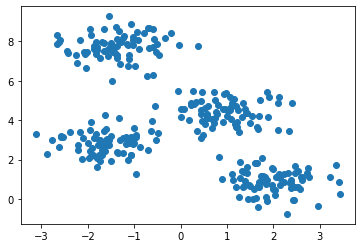

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1]);

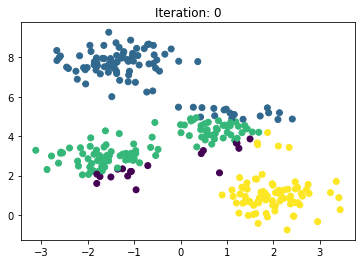

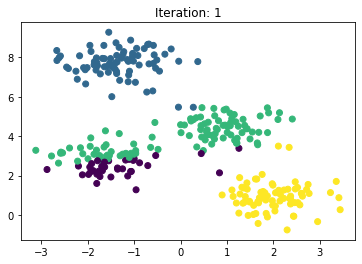

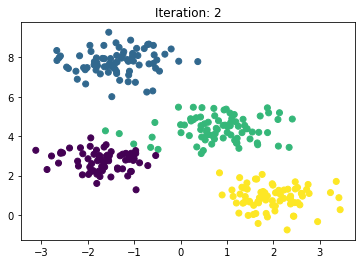

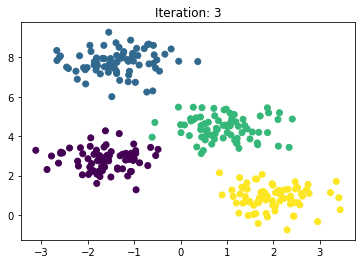

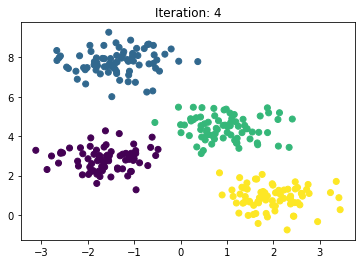

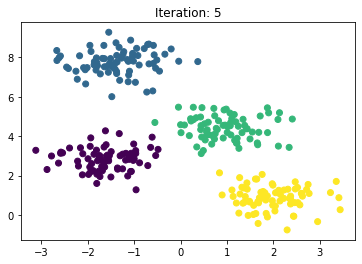

In [4]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X, visualize=True)

The objective that is optimized by k-Means is the sum of squared distances between points and their closest centroid.
Implement a function that computes the sum of squared distances between points and their closest centroid.

In [23]:
from scipy.spatial.distance import cdist

def sum_of_squared_distances(X, centroids):
    centroids = np.array(centroids)
    k = len(centroids)
    assignments = cdist(X, centroids).argmin(axis=1)
    ss = 0.
    for l in range(k): # this would be also possible in a vectorized way
        X_l = X[assignments==l]
        distances = cdist(X_l, centroids[l].reshape(1,-1))
        ss += distances.sum()
    return ss
        
        

Now, plot the sum of squared distances for a range of different values for k.

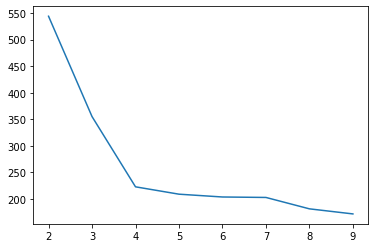

In [29]:
ss = []
ks = range(2,10)
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    
    ss.append(sum_of_squared_distances(X, kmeans.centroids))
    
plt.plot(ks, ss)
plt.show()

Why is this bad?

The sum of squared distances decreases monotonically (up to random effects) with k. Thus, a smaller sum of squared distances does not indicate a better clustering.